<a href="https://colab.research.google.com/github/zack-murray/DS-Unit-2-Applied-Modeling/blob/master/module2-wrangle-ml-datasets/LS_DS_232_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Wrangle ML datasets

- [ ] Continue to clean and explore your data. 
- [ ] For the evaluation metric you chose, what score would you get just by guessing?
- [ ] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

In [0]:
import pandas as pd
import numpy as np

# Read test_features.csv & sample_submission.csv
df = pd.read_csv(r'C:\Users\Z Dubs\spotify-data\top10s.csv')

In [0]:
# Drop Unnamed column as it provides no value
df = df.drop(['Unnamed: 0', 'title', 'artist'],axis=1)

# Rename columns making features more relateable
df.rename(columns = {'top genre': 'top_genre', 'bpm': 'beats_per_minute', 'nrgy': 'energy', 
                       'dnce': 'danceability', 'dB': 'loudness(dB)', 'live': 'liveness', 
                       'val': 'valence', 'dur': 'length', 'acous': 'acousticness', 
                       'spch': 'speechiness', 'pop': 'popularity'}, inplace=True)

In [0]:
# Combine top_genre categories
df['top_genre'] = df['top_genre'].str.lower()
# Find all instances of top_genre containing keywords
pop = df['top_genre'].str.contains('pop')
raprb = df['top_genre'].str.contains('hip|rap|r&b')
edm = df['top_genre'].str.contains('elect|room|house|step|edm')
# Define pop/raprb/edm/other variables
df.loc[pop, 'top_genre'] = 'pop'
df.loc[raprb, 'top_genre'] = 'rap / r&b'
df.loc[edm, 'top_genre'] = 'electronic dance'
df.loc[~pop & ~raprb & ~edm, 'top_genre'] = 'other'

df['top_genre'].value_counts()

pop                 466
other                63
electronic dance     43
rap/r&b              31
Name: top_genre, dtype: int64

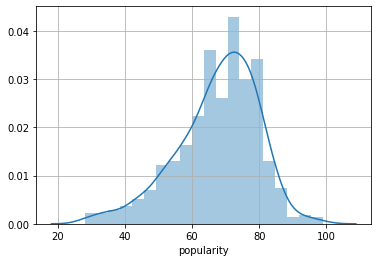

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Visualize the target
ax = sns.distplot(df['popularity'])
ax.grid()
plt.show()

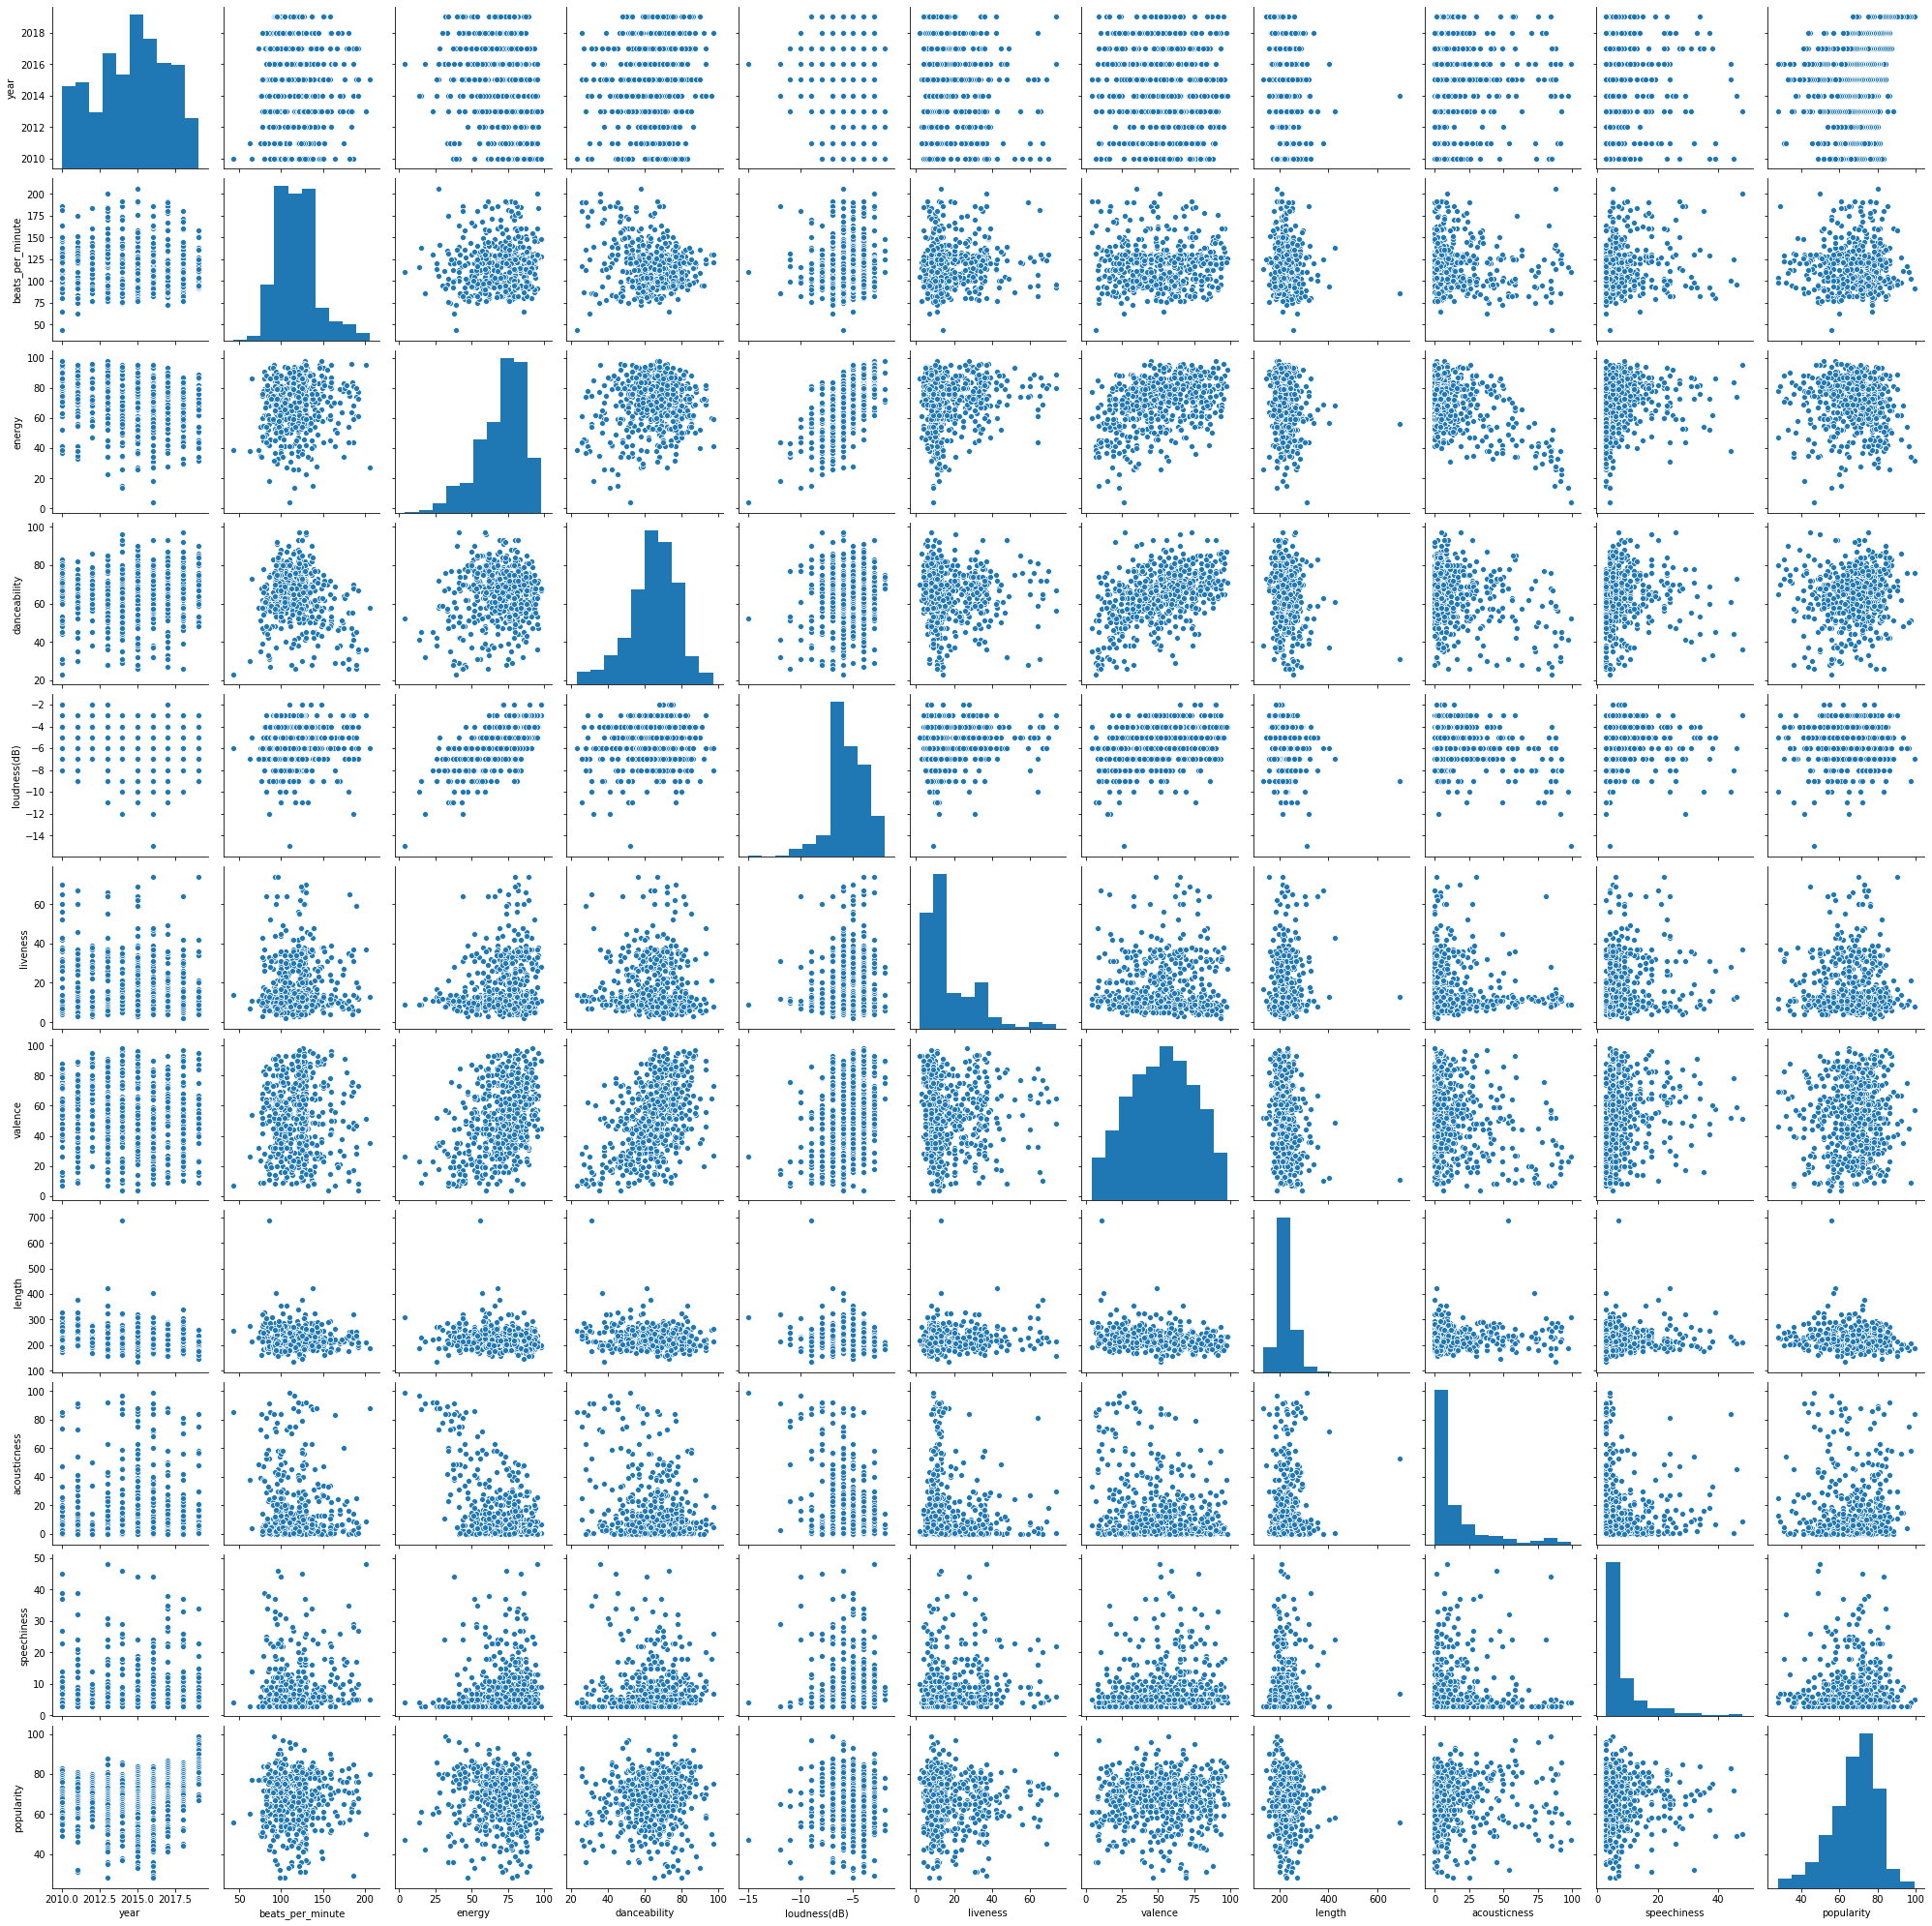

In [0]:
# Visualize comparison of target to features
sns.pairplot(df)
plt.show()

---
###For the evaluation metric you chose, what score would you get just by guessing?
---

In [0]:
# Mean Baseline (Regression, 'popularity' = target)
guess = df['popularity'].mean()
errors = guess - df['popularity']
mean_absolute_error = errors.abs().mean()
print(f'If we just guessed every song had a popularity of {guess:,.0f},')
print(f'we would be off by {mean_absolute_error:,.0f} on average.')

If we just guessed every song had a popularity of 68,
we would be off by 10 on average.


In [0]:
from datetime import datetime

# Converting game_date to datetime
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Altering data to be used as constraints in train/test split
cutoff = pd.to_datetime('2018')

# Seperate train and test sets
train = df[(df['year'] <= cutoff)]
test  = df[(df['year'] > cutoff)]

train.shape, test.shape

((572, 12), (31, 12))

In [0]:
# Designate target & features
target = 'popularity'
features = train.columns.drop([target] + ['year'])

#Assign target/features to train/test set
X_train = train[features]
y_train = train[target]
X_test  = test[features]
y_test  = test[target]

In [0]:
X_train

,top_genre,beats_per_minute,energy,danceability,loudness(dB),liveness,valence,length,acousticness,speechiness
0,other,97,89,67,-4,8,80,217,19,4
1,rap/r&b,87,93,75,-5,52,64,263,24,23
2,pop,120,84,76,-3,29,71,200,10,14
3,pop,119,92,70,-4,8,71,295,0,4
4,pop,109,84,64,-5,9,43,221,2,4
...,...,...,...,...,...,...,...,...,...,...
567,pop,120,55,79,-7,13,23,226,1,5
568,pop,110,76,75,-8,20,58,248,0,5
569,pop,160,84,58,-5,10,50,190,13,22
570,pop,130,59,97,-8,8,27,264,5,26


---
###Can you make a fast, first model that beats guessing?
---

In [0]:
# Import and perform one-hot encoding
import category_encoders as ce

# Instantiate one-hot encoder
encoder = ce.OneHotEncoder()

# Fit and transform on train/test sets
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

X_train

,top_genre_1,top_genre_2,top_genre_3,top_genre_4,beats_per_minute,energy,danceability,loudness(dB),liveness,valence,length,acousticness,speechiness
0,1,0,0,0,97,89,67,-4,8,80,217,19,4
1,0,1,0,0,87,93,75,-5,52,64,263,24,23
2,0,0,1,0,120,84,76,-3,29,71,200,10,14
3,0,0,1,0,119,92,70,-4,8,71,295,0,4
4,0,0,1,0,109,84,64,-5,9,43,221,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,0,0,1,0,120,55,79,-7,13,23,226,1,5
568,0,0,1,0,110,76,75,-8,20,58,248,0,5
569,0,0,1,0,160,84,58,-5,10,50,190,13,22
570,0,0,1,0,130,59,97,-8,8,27,264,5,26


In [0]:
from sklearn.linear_model import LinearRegression
# Instantiate model class
model = LinearRegression()
# Fit the model
model.fit(X_train, y_train)
# Apply the model to new data
y_pred1 = model.predict(X_train)
y_pred2 = model.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#RMSE, MAE, and R2 for training data
mse = mean_squared_error(train[target], y_pred1)
rmse = np.sqrt(mse)
mae = mean_absolute_error(train[target], y_pred1)
r2 = r2_score(train[target], y_pred1)
print(f'The RMSE of the training data is {rmse}')
print(f'The MAE of the training data is {mae}')
print(f'The R2 of the training data is {r2}')

The RMSE of the training data is 11.360973469333393
The MAE of the training data is 8.914737189609163
The R2 of the training data is 0.05469893674334547


In [0]:
#RMSE, MAE, and R2 for test data
mse = mean_squared_error(test[target], y_pred2)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test[target], y_pred2)
r2 = r2_score(test[target], y_pred2)
print(f'The RMSE of the test data is {rmse}')
print(f'The MAE of the test data is {mae}')
print(f'The R2 of the test data is {r2}')

The RMSE of the test data is 17.105603245469588
The MAE of the test data is 15.442876761662191
The R2 of the test data is -3.396619512761184
